# Brain Tumor Classification Project

## Loading & Preprocessing Dataset

In [37]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

training_dir = '/Users/maxhedemanjoosten/Documents/BSc2 Econometrie & Economie/Jaar 3/Machine & Deep Learning/Brain Tumor Classification/dataset/Training/'
testing_dir = '/Users/maxhedemanjoosten/Documents/BSc2 Econometrie & Economie/Jaar 3/Machine & Deep Learning/Brain Tumor Classification/dataset/Testing/'


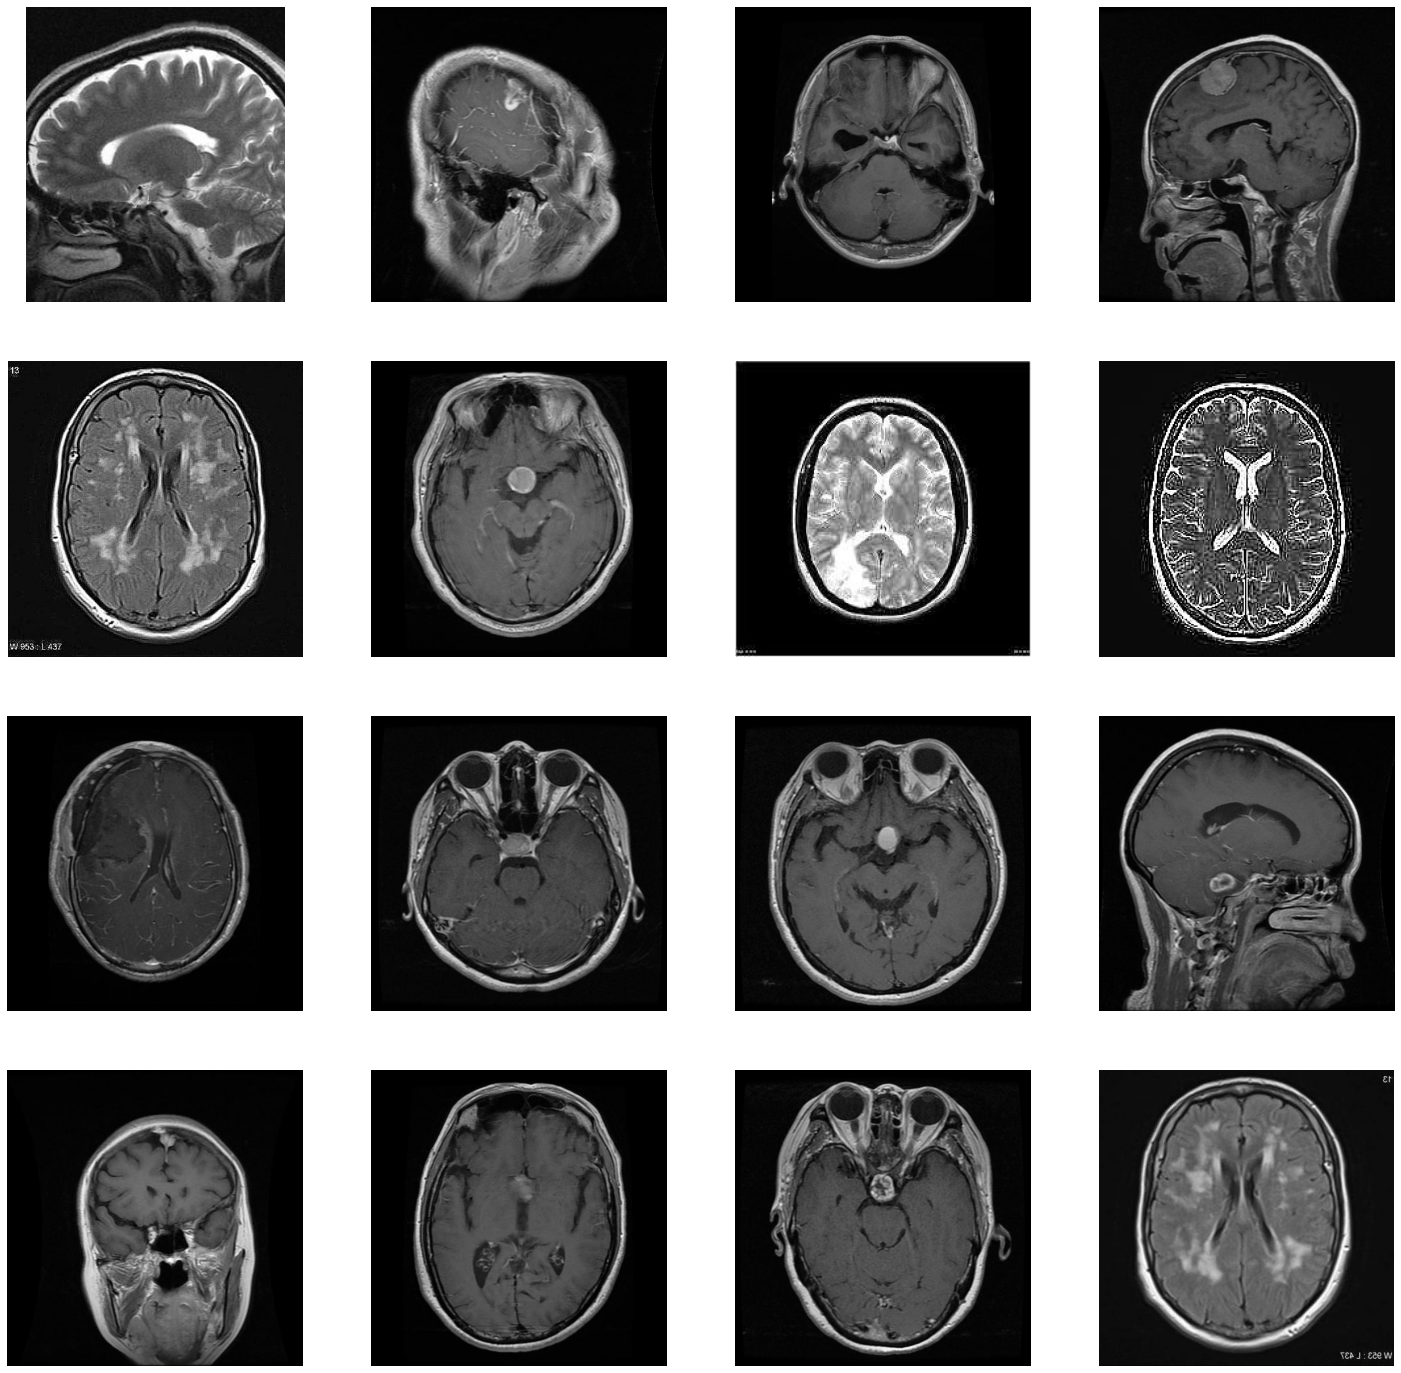

In [44]:
# Plot random images of the dataset
import random

images = []
for folder in os.listdir(training_dir):
  if folder == ".DS_Store":
    continue
  for image in os.listdir(os.path.join(training_dir, folder)):
    images.append(os.path.join(training_dir, folder, image))

plt.figure(1, figsize=(25, 25))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = Image.open(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs, cmap="Greys_r")

plt.show()

In [ ]:

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training and testing datasets
image_size = (128, 128)

training_images = []
training_labels = []
for i, label in enumerate(labels):
    folder_path = os.path.join(training_dir, label)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        image = Image.open(file_path)

        # Convert RGB to grayscale 
        gray_image = image.convert('L')
        resized_image = gray_image.resize(image_size)
        
        # Convert to array and normalize pixel values
        image_array = np.array(resized_image)
        normalized_image_array = image_array / 255.0
        
        training_images.append(normalized_image_array)
        training_labels.append(i)

testing_images = []
testing_labels = []
for i, label in enumerate(labels):
    folder_path = os.path.join(testing_dir, label)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        image = Image.open(file_path)

        # Convert RGB to grayscale 
        gray_image = image.convert('L')
        resized_image = gray_image.resize(image_size)
       
        # Convert to array and normalize pixel values
        image_array = np.array(resized_image)
        normalized_image_array = image_array / 255.0

        testing_images.append(normalized_image_array)
        testing_labels.append(i)

X_train = np.array(training_images)
X_train = X_train.reshape(-1, 128, 128, 1) 

Y_train = keras.utils.to_categorical(training_labels)

X_test = np.array(testing_images)
X_test = X_test.reshape(-1, 128, 128, 1)

Y_test = keras.utils.to_categorical(testing_labels)

## Convolutional Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(9, 9), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 64)      5248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 53824)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_data = (X_test, Y_test))

Epoch 1/10
572/572 [==============================] - 117s 203ms/step - loss: 0.5707 - accuracy: 0.7831 - val_loss: 0.4335 - val_accuracy: 0.8467
Epoch 2/10
572/572 [==============================] - 118s 207ms/step - loss: 0.2495 - accuracy: 0.9100 - val_loss: 0.2980 - val_accuracy: 0.8932
Epoch 3/10
572/572 [==============================] - 117s 205ms/step - loss: 0.1403 - accuracy: 0.9478 - val_loss: 0.2033 - val_accuracy: 0.9336
Epoch 4/10
572/572 [==============================] - 115s 202ms/step - loss: 0.0895 - accuracy: 0.9694 - val_loss: 0.1647 - val_accuracy: 0.9504
Epoch 5/10
572/572 [==============================] - 119s 208ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.1849 - val_accuracy: 0.9527
Epoch 6/10
572/572 [==============================] - 123s 214ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.3031 - val_accuracy: 0.9314
Epoch 7/10
572/572 [==============================] - 122s 214ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.2169 -

In [30]:
model.save("ClassifierV2")

INFO:tensorflow:Assets written to: ClassifierV2/assets


INFO:tensorflow:Assets written to: ClassifierV2/assets


In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_train, Y_train, batch_size=10)
print('Test accuracy:', test_acc)

572/572 [==============================] - 21s 36ms/step - loss: 0.0063 - accuracy: 0.9982
Test accuracy: 0.9982492923736572


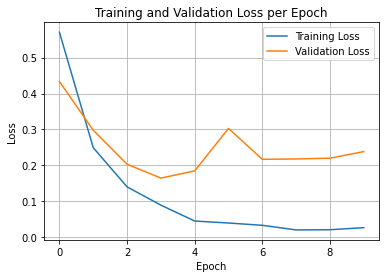

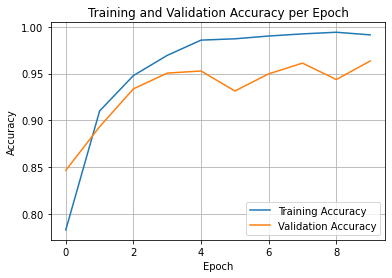

In [32]:
# plot losses
plt.plot(history.history["loss"], label='Training Loss') # plot loss
plt.plot(history.history["val_loss"], label="Validation Loss") # plot val_loss
plt.ylabel("Loss")
plt.xlabel("Epoch") # x-axis=epochs
plt.grid()
plt.legend()
plt.title("Training and Validation Loss per Epoch")
plt.show()

# plot accuracies
plt.plot(history.history["accuracy"], label='Training Accuracy') # plot accuracy
plt.plot(history.history["val_accuracy"], label='Validation Accuracy') # plot val_accuracy
plt.ylabel("Accuracy")
plt.xlabel("Epoch") # x-axis=epochs
plt.grid()
plt.legend()
plt.title("Training and Validation Accuracy per Epoch")
plt.show()

## Logistic Regression (Benchmark Model)

In [47]:
X_train_logistic = X_train.reshape(-1, 16384)
X_test_logistic = X_test.reshape(-1, 16384)

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()  # create the logistic regression object
modelLR = modelLR.fit(X_train_logistic, training_labels)  # fit on trainings data
#modelLR.intercept_, modelLR.coef_  # estimated coefficients

/Users/maxhedemanjoosten/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# use a function from sklearn
from sklearn.metrics import classification_report

pred_y = modelLR.predict(X_test)
print("Logistic Regression")
print(classification_report(Y_test, pred_y, digits=4))

ValueError: Found array with dim 4. LogisticRegression expected <= 2.